In [1]:
%run "~/alignment_accuracy/alignment_accuracy_functions.ipynb"

In [2]:
support_dict = {}

In [3]:
#baseline_muscle
#make_tree("PF00413_rp15_muscle.afa", "muscle_tree")
alrt = get_supports("PF00413_rp15_muscle.afa.treefile", metric="alrt")
bb = get_supports("PF00413_rp15_muscle.afa.treefile", metric="bb")

support_dict["baseline_muscle"] = (bb, alrt)

print("Mean Bootstrap:", np.mean(bb))
print("Mean aLRT:", np.mean(alrt))

Mean Bootstrap: 76.159179145868
Mean aLRT: 71.1334442595674


In [4]:
#baseline_pfam
#make_tree("PF00413_rp15_prealigned.afa", "pfam_tree")
alrt = get_supports("PF00413_rp15_prealigned.afa.treefile", metric="alrt")
bb = get_supports("PF00413_rp15_prealigned.afa.treefile", metric="bb")

support_dict["baseline_pfam"] = (bb, alrt)

print("Mean Bootstrap:", np.mean(bb))
print("Mean aLRT:", np.mean(alrt))

Mean Bootstrap: 84.59542410714286
Mean aLRT: 73.58694196428571


In [5]:
#baseline_pairwise
# realignment made w/ pop_size=20, max_rounds=100, max_generations=30
#make_tree("PF00413_rp15_muscle_realigned_300x.afa", "pairwise_tree")
alrt = get_supports("PF00413_rp15_muscle_realigned_300x.afa.treefile", metric="alrt")
bb = get_supports("PF00413_rp15_muscle_realigned_300x.afa.treefile", metric="bb")

support_dict["baseline_pairwise"] = (bb, alrt)

print("Mean Bootstrap:", np.mean(bb))
print("Mean aLRT:", np.mean(alrt))

Mean Bootstrap: 80.1787829833064
Mean aLRT: 68.25417339795369


In [6]:
#muscle trimmed 0.2 threshold 
#make_tree("PF00413_rp15_muscle_trimmed_20_300x.afa", "muscle_t20_tree")
alrt = get_supports("PF00413_rp15_muscle_trimmed_20_300x.afa.treefile", metric="alrt")
bb = get_supports("PF00413_rp15_muscle_trimmed_20_300x.afa.treefile", metric="bb")

support_dict["muscle_trimmed_t20"] = (bb, alrt)

print("Mean Bootstrap:", np.mean(bb))
print("Mean aLRT:", np.mean(alrt))

Mean Bootstrap: 81.65169162506933
Mean aLRT: 72.55601774819745


In [7]:
#muscle trimmed 0.5 threshold 
#make_tree("PF00413_rp15_muscle_trimmed_50_300x.afa", "muscle_t50_tree")
alrt = get_supports("PF00413_rp15_muscle_trimmed_50_300x.afa.treefile", metric="alrt")
bb = get_supports("PF00413_rp15_muscle_trimmed_50_300x.afa.treefile", metric="bb")

support_dict["muscle_trimmed_t50"] = (bb, alrt)

print("Mean Bootstrap:", np.mean(bb))
print("Mean aLRT:", np.mean(alrt))

Mean Bootstrap: 80.16263736263737
Mean aLRT: 69.52131868131869


In [8]:
#muscle realigned trimmed 0.2 threshold 
#make_tree("PF00413_rp15_muscle_realigned_trimmed_20_300x.afa", "muscle_re_t20_tree")
alrt = get_supports("PF00413_rp15_muscle_realigned_trimmed_20_300x.afa.treefile", metric="alrt")
bb = get_supports("PF00413_rp15_muscle_realigned_trimmed_20_300x.afa.treefile", metric="bb")

support_dict["muscle_re_trimmed_t20"] = (bb, alrt)

print("Mean Bootstrap:", np.mean(bb))
print("Mean aLRT:", np.mean(alrt))

Mean Bootstrap: 78.08831448572967
Mean aLRT: 68.75223478729133


In [9]:
#muscle realigned trimmed 0.5 threshold 
#make_tree("PF00413_rp15_muscle_realigned_trimmed_50_300x.afa", "muscle_re_t50_tree")
alrt = get_supports("PF00413_rp15_muscle_realigned_trimmed_50_300x.afa.treefile", metric="alrt")
bb = get_supports("PF00413_rp15_muscle_realigned_trimmed_50_300x.afa.treefile", metric="bb")

support_dict["muscle_re_trimmed_t50"] = (bb, alrt)

print("Mean Bootstrap:", np.mean(bb))
print("Mean aLRT:", np.mean(alrt))

Mean Bootstrap: 77.7059773828756
Mean aLRT: 67.59165320409262


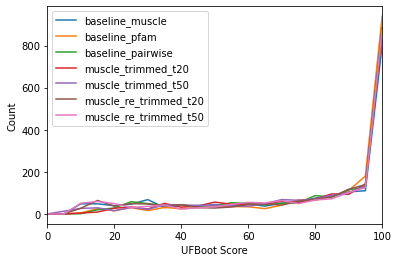

In [10]:
fig, ax = plt.subplots()
#max_ever = 0
for test in support_dict:
    bb, alrt = support_dict[test]
    #ax.hist(bb, range=[0,100], label=test, alpha=0.5)
    bb_hist = [len([x for x in bb if (x <= i) and (x > i-5)]) for i in range(0,105,5)]
    #max_ever = max(max(bb_hist), max_ever)
    ax.plot(range(0,105,5), bb_hist, label=test)
    #ax.vlines([np.mean(bb)], 0, np.sum(bb), label=test)

ax.set_xlabel("UFBoot Score")
ax.set_ylabel("Count")
ax.set_xlim(0, 100)
#ax.set_ylim(0,max_ever)
ax.legend()

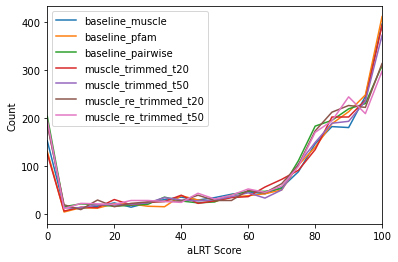

In [11]:
fig, ax = plt.subplots()

for test in support_dict:
    bb, alrt = support_dict[test]
    alrt_hist = [len([x for x in alrt if (x <= i) and (x > i-5)]) for i in range(0,110,5)]
    ax.plot(range(0,110,5), alrt_hist, label=test)
    #ax.hist(alrt, range=[0,100], label=test, alpha=0.3)

ax.set_xlabel("aLRT Score")
ax.set_ylabel("Count")
ax.set_xlim(0, 100)
ax.legend()